# Introduction

## Goal.
The goal of this lab is to perform some preliminary experiments aimed at understanding some advantages and pitfalls of Evolutionary Algorithms (EAs). In particular, you will observe the effects of mutations and problem dimensionality, and reflect to what extent these observations also apply to biological evolution.

Note that, unless otherwise specified, in this module's exercises we will use real-valued genotypes. 
I.e., an individual is a vector of real-valued parameters $\mathbf{x} = \{x_1, x_2, \dots, x_N\}$ (however, keep in mind that other types of individual representations are possible, such as trees or bit strings, which will not be explored in this lab). The fitness of an individual is given by the fitness function $f(\mathbf{x})$. The aim of the algorithms will be to *minimize* the fitness function $f(\mathbf{x})$, i.e. to find the vector $\mathbf{x}_{min}$ that has the lowest value $f(\mathbf{x})$. In other words, lower values $f(\mathbf{x})$ correspond to a better fitness!



# Exercise 1
In this first exercise, we will not yet run a complete EA. Instead, we consider a single parent individual **$x_{0}$**, from which a number of offspring individuals are created using a Gaussian mutation operator (which adds a random number from a Gaussian distribution with mean zero and standard deviation $\sigma$ to each parameter $x_i$ of the parent). The fitness function, shown in the figure below for $N=2$ variables, is defined as:

<br>
$f(\mathbf{x}) = \sum_{i=1}^{N}{x^2_i}$
<br>

![sphere.png](img/img_01/sphere.png)

This function is usually defined to as *sphere* function$^{[1]}$ and is one of the most used benchmark functions in continuous (real-valued) optimization. This fitness function is unimodal, i.e. it has a single global minimum at the origin. Furthermore, this function is *scalable*, i.e. it can be defined for any arbitrary number of variables ($N=1, 2, 3, ...$, i.e. $N \in \mathbb{N}$).
We will analyze the effects of mutations on the fitness depending on the value of the parent $\mathbf{x}_0$, the mutation magnitude$^{[2]}$ (the standard deviation $\sigma$), and the number of dimensions $N$ of the search space.

To start the experiments, run the next cell$^{[3]}$. It willl generate offspring from a single parent $\mathbf{x}_0$ using a Gaussian mutation operator (which adds a random number from a Gaussian distribution with mean zero and standard deviation $\sigma$ to the parent). Generate offspring from different parents (e.g. $\mathbf{x}_0$=0.1, 1, 10) using different mutation magnitudes (standard deviations $\sigma$). First consider the one-dimensional case, then two dimensions, and finally many dimensions (e.g. $N =100$). For one or two dimensions, the fitness landscape with the parent and the offspring is shown. For more dimensions, a __[boxplot](http://matplotlib.org/api/pyplot_api.html\#matplotlib.pyplot.boxplot)__ with the fitness of the offspring is shown where the green, dashed line is the fitness of the parent.

Try to answer the following questions:

- Do the mutations tend to improve or worsen the fitness of the parent?
- Are low or high mutation magnitudes best for improving the fitness? How does this depend on the initial value of the parent and on the number of dimensions of the search space?


---

[1]: 
Note that its contour lines, i.e. the loci of points for which the function has a constant value, are $N$-dimensional *spheres* centered in **0**. For instance, in 2-D, the contour lines are curves described by $x^2_1+x^2_2=k$, which correspond to a circle (the equivalent of a sphere in 2 dimension) with radius $\sqrt{k}$ and center in $\{0,0\}$. In 3-D, the contour lines are curves described by $x^2_1+x^2_2+x^2_3=k$, which correspond to a sphere with radius $\sqrt{k}$ and center in $\{0,0,0\}$. For $N>3$, each contour line corresponds to a *hyper-sphere*, i.e. a generalization of a sphere.

[2]: 
In the following, *mutation magnitude* indicates a generic measure of the mutation effect on the genotype. E.g. in continuous optimization with Gaussian mutation $x'=x+\mathcal{N}(0, \sigma$) the *mutation magnitude* is simply $\sigma$. This is different from the *mutation probability*, that is the chance that a given loci would be mutated. The combination of these two aspects, magnitude and probability, may be considered the overall *mutation rate*.] 

[3]: 
For all the exercises in this lab you may set the seed for the pseudo-random number generator. This will allow you to reproduce your results. 


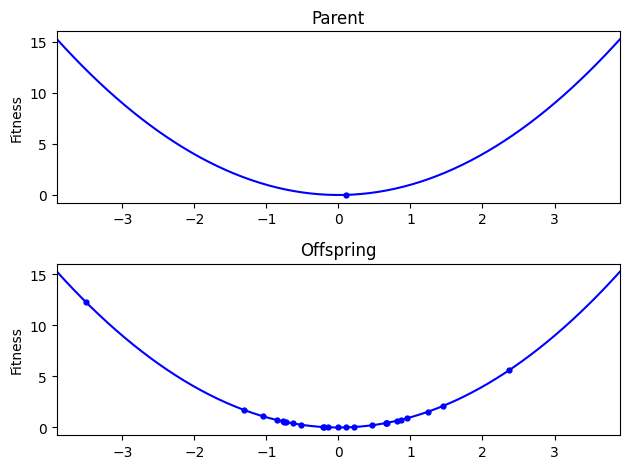

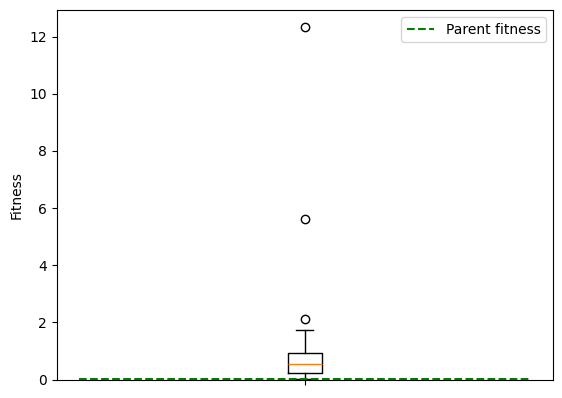

In [1]:
from pylab import *
from utils.utils_01.ga import generate_offspring
from random import Random
import sys

# NOTE: the following lines fix a bug with the new version (summer 2023) of inspyred
import collections
collections.Iterable = collections.abc.Iterable
collections.Sequence = collections.abc.Sequence

"""
-------------------------------------------------------------------------
Edit this part to do the exercises

Choose the parent x0 that will be mutated. It can have an arbitrary 
number of dimensions, but plotting of the fitness landscape is only 
possible for the 1D or 2D case.
"""

N = 100 # Number of dimensions

#--------- One-dimensional case (1 parameter) ---------#
x0 = [0.1]
#x0 = [1]
#x0 = [10]

#--------- Two-dimensional case (2 parameters) ---------#
#x0 = [0.1, 0.1]
#x0 = [1, 1]
#x0 = [10, 10]

#--------- Multi-dimensional case (N parameters) ---------#
#x0 = 0.1*ones(N)
#x0 = 1*ones(N)
#x0 = 10*ones(N)

# Set the standard deviation of the Gaussian mutations
std_dev = 1

# Set number of offspring to be generated
num_offspring = 25

"""
-------------------------------------------------------------------------
"""

args = {}
args["fig_title"] = 'Random sampling'

seed = None
rng = Random(seed)
plot_fitness_landscape = True # Set to False to disable the plots
parent_fitness, offspring_fitnesses = generate_offspring(rng, x0, std_dev,
                                                num_offspring, 
                                                plot_fitness_landscape,
                                                args)

"""
Boxplot of the offspring fitnesses. The fitness of the parent is plotted as
a dashed, green line.
"""
fig = figure('Offspring fitness')
ax = fig.gca()
ax.boxplot(offspring_fitnesses)
ax.set_xticklabels([])
ax.plot([0,2], [parent_fitness,parent_fitness], 'g--', label='Parent fitness');
ax.set_ylabel('Fitness')
ax.set_ylim(ymin=0)
ax.legend()
show()

# Exercise 2

In this exercise we will try to confirm the observations that we did qualitatively in the previous exercise, by plotting boxplots side-by-side to evaluate the statistical significance of observed differences.

Run the next cell, and compare different values for:

- the number of dimensions of the search space;
- the value of the parent (how close it is to the optimum);
- the mutation magnitude $\sigma$;

and try to confirm the answers that you gave in the previous exercise. See the comments in the script for more details.

**NOTE**: If you vary one of these three parameters, *make sure that you set the other two at a constant value* (otherwise it may be difficult to interpret your results).

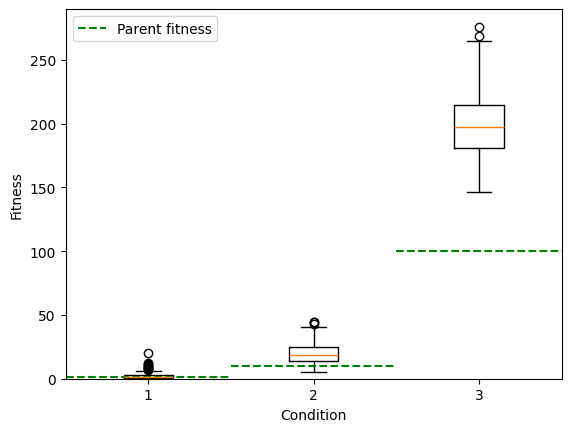

In [2]:
from utils.utils_01.ga import generate_offspring
from pylab import *
from random import Random
import sys

""" 
-------------------------------------------------------------------------
Edit this part to do the exercises

Try different values for either:
    (1) the number of dimensions of the search space
    (2) how close the parent is to the global optimum
    (3) the mutation rate
 If you vary one of the three things, you may want to keep the other two
 at a constant value to better understand the effects (as shown in the
 example below).
"""

# (1) Vary the number of dimensions of the search space
num_vars_1 = 1;
num_vars_2 = 10;
num_vars_3 = 100;

# (2) Vary how close the parent is to the optimum
value_1 = 1;
value_2 = 1;
value_3 = 1;

# The parents are created for the three conditions
x0_1 = value_1*ones(num_vars_1);
x0_2 = value_2*ones(num_vars_2);
x0_3 = value_3*ones(num_vars_3);

# (3) Vary the standard deviation of the Gaussian mutations
std_dev_1 = 1;
std_dev_2 = 1;
std_dev_3 = 1;

# Number of offspring to be generated
num_offspring = 200;

"""
-------------------------------------------------------------------------
"""

args = {}
seed = None
rng = Random(seed)
# Generate offspring for the three conditions
args["fig_title"] = 'Random sampling (condition 1)'
parent_fitness_1, offspring_fitness_1 = generate_offspring(rng, x0_1, 
                                                           std_dev_1, 
                                                           num_offspring, 
                                                           False, args);
args["fig_title"] = 'Random sampling (condition 2)'
parent_fitness_2, offspring_fitness_2 = generate_offspring(rng, x0_2, 
                                                           std_dev_2, 
                                                           num_offspring, 
                                                           False, args);
args["fig_title"] = 'Random sampling (condition 3)'
parent_fitness_3, offspring_fitness_3 = generate_offspring(rng, x0_3,
                                                           std_dev_3, 
                                                           num_offspring, 
                                                           False, args);

"""
Boxplot of the offspring fitnesses. The fitness of the parent is plotted as
a dashed, green line.
"""
fig = figure('Offspring fitness')
ax = fig.gca()
ax.boxplot([offspring_fitness_1, offspring_fitness_2, offspring_fitness_3],
           notch=False)
ax.plot([0.5, 1.5], [parent_fitness_1, parent_fitness_1], 'g--', label='Parent fitness');
ax.plot([1.5, 2.5], [parent_fitness_2, parent_fitness_2], 'g--');
ax.plot([2.5, 3.5], [parent_fitness_3, parent_fitness_3], 'g--');
ax.set_xticklabels(['1', '2', '3'])
ax.set_xlabel('Condition')
ax.set_ylabel('Fitness')
ax.set_ylim(ymin=0)
ax.legend()
show()

# Exercise 3

We will now use an EA to find the minimum of the unimodal fitness function defined in the previous exercise and analyze the effect of the mutation magnitude and the dimensionality of the search space on the results.

Run the next cell to run a basic, mutation-only EA on the 1-D sphere function first.

- How close is the best individual from the global optimum? 

Increase the dimensionality of the search space to two and more.

- How close are the best individuals now from the global optimum?
- Can you get as close as in the one-dimensional case by modifying the mutation magnitude and/or the number of generations?


Best Individual: [0.00012754]
Best Fitness: 1.62667534457049e-08
Distance from Global Optimum 0.000127541183331914


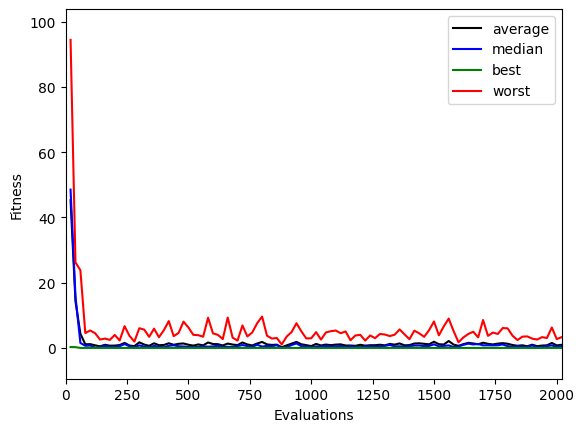

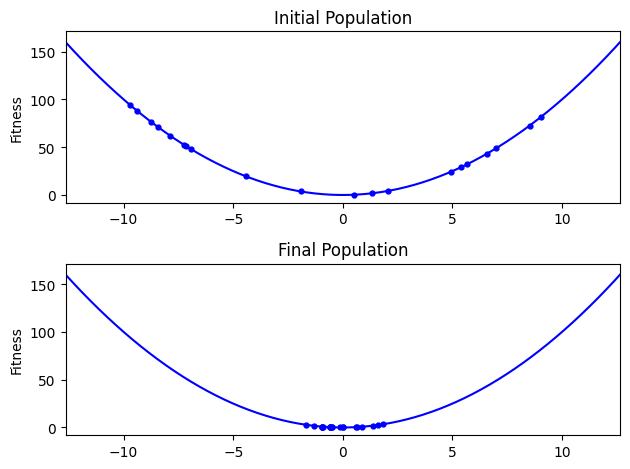

In [3]:
from pylab import *
from random import Random
from utils.utils_01.ga import run_ga
import sys

"""    
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

num_vars = 1 # Number of dimensions of the search space
std_dev = 1 # Standard deviation of the Gaussian mutations
max_generations = 100 # Number of generations of the GA

# parameters for the GA
args = {}
args["crossover_rate"] = 0 # Crossover fraction
args["tournament_size"] = 2
args["mutation_rate"] = 1.0 # fraction of loci to perform mutation on
args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["pop_size"] = 20
args["pop_init_range"] = [-10, 10] # Range for the initial population
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = None
rng = Random(seed)
# Run the GA
best_individual, best_fitness, final_pop = run_ga(rng, num_vars=num_vars,
                                                  max_generations=max_generations,
                                                  display=display,
                                                  gaussian_stdev=std_dev,**args)

# Display the results
print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)
# The distance from the optimum in the N-dimensional space
print("Distance from Global Optimum", sqrt(sum(array(best_individual) ** 2)))
if display :
    ioff()
    show()

# Exercise 4
In this exercise we will try to confirm the observations that we did qualitatively in the previous exercise, by plotting boxplots side-by-side to evaluate the statistical significance of observed differences.

Run the next cell to do three batches of $30$ runs of the EA with different mutation magnitudes (it may take a minute). The boxplot compares the best fitness values obtained (at the end of each run) in the three conditions.

- Did you see any difference in the best fitness obtained? Try to explain the result.


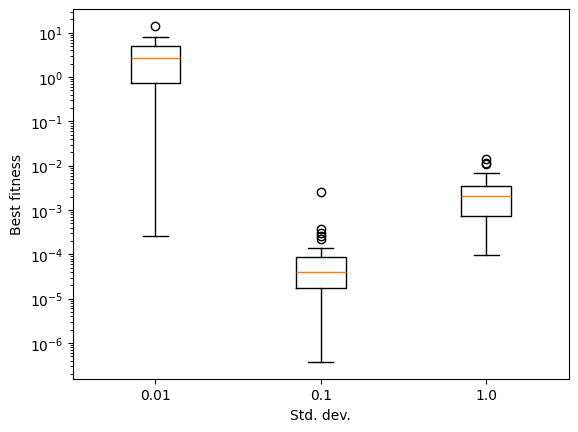

In [4]:
from pylab import *
from random import Random
from utils.utils_01.ga import run_ga
import sys

"""    
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

num_vars = 2 # Number of dimensions of the search space
std_devs = [0.01, 0.1, 1.0] # Standard deviation of the Gaussian mutations
max_generations = 50 # Number of generations of the GA
num_runs = 30 # Number of runs to be done for each stdev

# parameters for the GA
args = {}
args["crossover_rate"] = 0 # Crossover fraction
args["tournament_size"] = 2
args["mutation_rate"] = 1.0 # fraction of loci to perform mutation on
args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["pop_size"] = 20 # population size
args["pop_init_range"] = [-10, 10] # Range for the initial population
display = False # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = None
rng = Random(seed)
# run the GA *num_runs* times for each std_dev and record the best fits
best_fitnesses = [[run_ga(rng, num_vars=num_vars, 
                          max_generations=max_generations, display=display,
                          gaussian_stdev=std_dev,**args)[1] 
                    for _ in range(num_runs)]
                    for std_dev in std_devs]

fig = figure('GA (best fitness)')
ax = fig.gca()
ax.boxplot(best_fitnesses)
ax.set_xticklabels(std_devs)
ax.set_yscale('log')
ax.set_xlabel('Std. dev.')
ax.set_ylabel('Best fitness')
show()

## Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 

- What is the genotype and what is the phenotype in the problems considered in this lab?
- What are the advantages and disadvantages of low/high mutation magnitudes in EAs?
- Based on the previous observations, do you think there is an optimal mutation magnitude for a biological organism? 
Do mutations typically improve or worsen the fitness of a biological organism? In which situations do you think low/high mutation 
rates are advantageous for a population of bacteria?